## DATA601 - Spring 2022
### HW Assignment 2
Due date: February 24, 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import os
import re

<b>Intro:</b> Download this zip file and extract it. 
https://github.com/simsekergun/DATA601/raw/main/Datasets/DeviceData.zip

There are 150 csv files. In csv file, there are two columns: frequency (f) and efficiency (Q). First column is same in all the csv files. 

The name of the files gives the device parameters. For example, 
"Aphi_AirClad_H410RW855_PulleyCurved_Lc5_G100_W550_Mode1.csv" means that 
- H = 410
- RW = 855
- Lc = 5
- G = 100
- W = 510

<b> Q1. </b> Use pandas to read these csv files with a for loop, create a dataframe called "device_performances", which lists first the device parameters (RW, Lc, G, W) and then all the Q values for each frequncy (from 1800 to 50000 at the steps of 5)
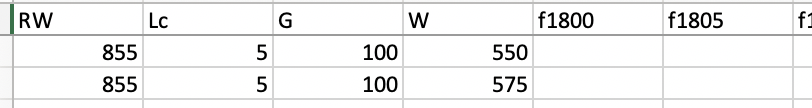

In [2]:
# Your answer is here

# Getting all the file names in DeviceData and saving it in a list

csv_files = os.listdir()
csv_files = [i for i in csv_files if 'PulleyCurved' in i]

In [3]:
# Creating empty DataFrame

device_performances = pd.DataFrame(columns = ['H', 'RW', 'Lc', 'G', 'W', *['f' + str(j) for j in range(1800, 5001, 5)]])
columns = device_performances.columns.values


for i in csv_files:
    data = pd.read_csv('./' + i, header = None)
    
    reg_comp = re.compile(r'[^_]*_[^_]*_H(\d*)RW(\d*)_[^_]*_Lc(\d*)_G(\d*)_W(\d*)')
    reg = re.match(reg_comp, i)
    
    
    values = [int(reg.group(i)) for i in range(1, 6)] + list(data[1].values)
    temp_df = pd.DataFrame([values], columns = columns)
    device_performances = device_performances.append(temp_df, ignore_index = True)

In [4]:
device_performances.head()

H   RW  Lc    G    W  f1800  f1805  f1810  f1815  f1820  ...  \
0  410  855  10  100  550    NaN    NaN    NaN    NaN    NaN  ...   
1  410  855  10  100  575    NaN    NaN    NaN    NaN    NaN  ...   
2  410  855  10  100  600    NaN    NaN    NaN    NaN    NaN  ...   
3  410  855  10  100  625    NaN    NaN    NaN    NaN    NaN  ...   
4  410  855  10  100  650    NaN    NaN    NaN    NaN    NaN  ...   

         f4955        f4960        f4965        f4970        f4975  \
0  647790.4342  649375.5300  650998.5392  652651.1596  654300.2354   
1  412484.0997  414423.8227  416381.2066  418354.9567  420339.3840   
2  317731.9385  319649.6232  321580.0641  323523.7796  325483.5015   
3  274559.7752  276465.9257  278383.3832  280313.3570  282262.3565   
4  255050.3894  256980.4427  258921.4770  260875.0281  262849.9221   

         f4980        f4985        f4990        f4995        f5000  
0  655947.1782  657658.5961  659389.4499  661109.3616  662777.0394  
1  422334.8538  424352.8179  426385.6454  428428.4049  430434.7884  
2  327459.4248  329446.1528  331447.3710  333465.9325  335457.7014  
3  284230.5662  286205.0784  288194.5974  290205.4477  292194.9967  
4  264846.3535  266846.9294  268863.3036  270903.9703  272926.7103  

[5 rows x 646 columns]

<b> Q2. </b> a. Determine the shape of your dataframe <br>
b. Check the first and last rows. <br>
c. Determine the basics statistics (mean, min, max, etc.) <br>
c. Remove the columns if they are all empty (or NaN)  <br>
d. Save your dataframe as a csv file.

In [5]:
# Your answer is here 
# a.

print('Shape of the dataframe is ')
print('Rows ------->', device_performances.shape[0])
print('Columns ---->', device_performances.shape[1])

Shape of the dataframe is 
Rows -------> 150
Columns ----> 646


In [6]:
# Your answer is here 
# b.

# Checking first row

device_performances.head(1)

H   RW  Lc    G    W  f1800  f1805  f1810  f1815  f1820  ...  \
0  410  855  10  100  550    NaN    NaN    NaN    NaN    NaN  ...   

         f4955      f4960        f4965        f4970        f4975        f4980  \
0  647790.4342  649375.53  650998.5392  652651.1596  654300.2354  655947.1782   

         f4985        f4990        f4995        f5000  
0  657658.5961  659389.4499  661109.3616  662777.0394  

[1 rows x 646 columns]

In [7]:
# Checking last row

device_performances.tail(1)

H   RW Lc    G    W  f1800  f1805  f1810  f1815  f1820  ...  \
149  410  855  9  300  650    NaN    NaN    NaN    NaN    NaN  ...   

            f4955         f4960         f4965         f4970         f4975  \
149  2.125693e+08  2.159946e+08  2.194996e+08  2.230631e+08  2.266800e+08   

            f4980         f4985         f4990         f4995         f5000  
149  2.303505e+08  2.340867e+08  2.378828e+08  2.417344e+08  2.456314e+08  

[1 rows x 646 columns]

In [8]:
# Your answer is here 
# c.

device_performances.describe()

f1800  f1805  f1810  f1815  f1820  f1825  f1830  f1835  f1840  f1845  \
count    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
mean     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
min      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25%      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
50%      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
75%      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
max      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       ...         f4955         f4960         f4965         f4970  \
count  ...  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02   
mean   ...  7.929152e+07  8.046807e+07  8.167144e+07  8.289345e+07   
std    ...  1.295971e+08  1.316150e+08  1.336814e+08  1.357822e+08   
min    ...  2.550504e+05  2.569804e+05  2.589215e+05  2.608750e+05   
25%    ...  1.800910e+06  1.818163e+06  1.835691e+06  1.853297e+06   
50%    ...  1.156564e+07  1.170032e+07  1.183791e+07  1.197654e+07   
75%    ...  7.195339e+07  7.296281e+07  7.399831e+07  7.504720e+07   
max    ...  5.202745e+08  5.289413e+08  5.378599e+08  5.469349e+08   

              f4975         f4980         f4985         f4990         f4995  \
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02   
mean   8.413298e+07  8.539013e+07  8.666815e+07  8.796569e+07  8.928070e+07   
std    1.379138e+08  1.400760e+08  1.422772e+08  1.445133e+08  1.467811e+08   
min    2.628499e+05  2.648464e+05  2.668469e+05  2.688633e+05  2.709040e+05   
25%    1.871161e+06  1.889201e+06  1.907363e+06  1.925713e+06  1.944243e+06   
50%    1.211698e+07  1.225933e+07  1.240301e+07  1.254870e+07  1.269557e+07   
75%    7.611037e+07  7.718981e+07  7.828326e+07  7.939233e+07  8.051281e+07   
max    5.561426e+08  5.654813e+08  5.750039e+08  5.846822e+08  5.944958e+08   

              f5000  
count  1.500000e+02  
mean   9.060909e+07  
std    1.490741e+08  
min    2.729267e+05  
25%    1.962758e+06  
50%    1.284344e+07  
75%    8.164861e+07  
max    6.044536e+08  

[8 rows x 641 columns]

In [9]:
# Your answer is here 
# d.

# Dropping all the columns with are all empty
drop_columns = device_performances.columns[(device_performances.isna().sum(axis = 0) == device_performances.shape[0])].values
device_performances.drop(drop_columns, inplace = True, axis = 1)
print('Shape of the dataframe after dropping the columns is', device_performances.shape)


Shape of the dataframe after dropping the columns is (150, 630)


In [10]:
# Saving the final file as a csv
device_performances.to_csv('modified.csv', index = False)

<b> Q3. </b> Read the csv file you created in the previous question again using pandas.
Either using melt or stuck, create a new dataframe which list device parameters (RW, Lc, G, W), frequency, and quantum efficiency in the following format.

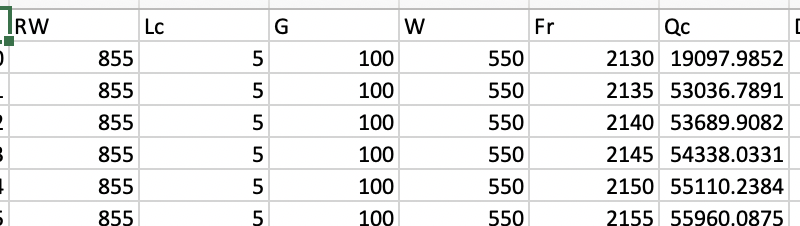

In [11]:
# Your answer is here 

new_data = pd.read_csv('./modified.csv')

# Using melt to modify the imported data
new_df = new_data.melt(id_vars = ['H', 'RW', 'Lc', 'G', 'W'], var_name = 'Fr', value_name = 'Qc')

# Converting 'Fr' column to numeric values
new_df.Fr = pd.Series(new_df.Fr.str[1:], dtype = 'int64')

new_df.head()

H   RW  Lc    G    W    Fr         Qc
0  410  855  10  100  550  1880        NaN
1  410  855  10  100  575  1880        NaN
2  410  855  10  100  600  1880        NaN
3  410  855  10  100  625  1880        NaN
4  410  855  10  100  650  1880  4983.5471

<b> Q4. </b> Read the following dataset with pandas.
https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/multiindex_dataset.csv



In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/multiindex_dataset.csv', parse_dates=['Date'])

In [13]:
df.head(5)

Date    Store Category Subcategory       UPC EAN  \
0 2018-07-11  Store 3     Beer        Ales  736920111112   
1 2018-07-11  Store 2     Beer        Ales  736920111112   
2 2018-07-10  Store 3     Beer        Ales  736920111112   
3 2018-07-10  Store 2     Beer        Ales  736920111112   
4 2018-07-12  Store 3     Beer        Ales  736920111112   

                           Description  Dollars  Units  
0  Goose Island - Honkers Ale - 6 Pack    35.68      4  
1  Goose Island - Honkers Ale - 6 Pack   166.74     14  
2  Goose Island - Honkers Ale - 6 Pack    67.36      8  
3  Goose Island - Honkers Ale - 6 Pack    80.01      9  
4  Goose Island - Honkers Ale - 6 Pack    78.30     10

Use multiindexing and determine <br>
a. How much total money has been made in each store <br>
b. How many units have been sold <br>
c. Which store sold the highest number of beer units <br>
d. Most profitable product (profit = $$/unit)


In [14]:
# Question (a)

store = df.groupby('Store').sum()[['Dollars']]
store.Dollars = store.Dollars.apply(lambda x: str(round(x, 2)) + ' $')
store

Dollars
Store             
Store 1   1649.4 $
Store 2  8221.65 $
Store 3  9073.29 $

In [15]:
# Question (b)

units = df.groupby('Store').sum()[['Units']]

print('Total units sold =', units.Units.sum())
units

Total units sold = 1208


Units
Store         
Store 1    182
Store 2    454
Store 3    572

In [16]:
# Question (c)

x = df.groupby(['Store', 'Category']).sum().sort_values('Units', ascending = False)
x[(x.index.get_level_values(1) == "Beer")][['Units']]

Units
Store   Category       
Store 3 Beer        274
Store 2 Beer        228
Store 1 Beer         39

- Store 3 has sold most number of Beer units

In [17]:
# Question (d)

df['Profit'] = df.Dollars/df.Units
product = df.groupby('Description').sum().sort_values('Profit', ascending = False)[['Profit']]
print('Most profitable product is', product.index[0], 'with profit value of', round(product.iloc[0,0], 2), '$ per unit')
product

Most profitable product is Glenlivet - 12 Year Scotch Whisky - 750 mL Bottle with profit value of 440.66 $ per unit


Profit
Description                                              
Glenlivet - 12 Year Scotch Whisky - 750 mL Bottle  440.66
Don Julio - Tequila Blanco - 750 mL Bottle         304.42
Grey Goose - Imported Vodka - 750 mL Bottle        248.02
Curious Beasts - Chardonnay - 750 mL Bottle        245.58
Omission Pale Ale - Gluten Free Pale Ale - 6 Pack  126.52
Sierra Nevada Brewing Co. - Stout - 6 Pack         121.36
Dark Horse - S. Blanc Rose - 750 mL Bottle         109.00
Omission - Gluten Free Lager - 6 Pack               91.38
Bowser Beer - Beefy Brown Ale - 6 Pack              90.15
Trapiche - Malbec - 750 mL Bottle                   88.46
Colt 45 - Malt Liquor - 6 Pack                      81.83
Yellow Tail - Merlot - 750 mL Bottle                74.49
Goose Island - Honkers Ale - 6 Pack                 71.26